In [12]:
import statistics as st
import numpy as ny
import matplotlib.pyplot as fig
import openpyxl as ox
import seaborn as sns
from scipy import stats
import pandas as pd

In [19]:
def csv_to_xls(csv_file, xls_file, sheet_name='Sheet1'):
    # Lê o arquivo CSV
    df = pd.read_csv(csv_file)
    
    # Salva como arquivo XLS
    df.to_excel(xls_file, index=False, sheet_name=sheet_name)

# Exemplo de uso

csv_to_xls('BTC-USD.csv', 'BTC-USD.xlsx')
csv_to_xls('ETH-USD.csv', 'ETH-USD.xlsx')

In [20]:
wb = ox.load_workbook('BTC-USD.xlsx')
wb2 = ox.load_workbook('ETH-USD.xlsx')
btc = wb['Sheet1']
eth = wb2['Sheet1']

fechamentobtc = []
fechamentoeth = []

for linha in btc.iter_rows(min_row=2, min_col=5, max_col=5):
	for celula in linha:
		fechamentobtc.append(celula.value)

for linha in eth.iter_rows(min_row=2, min_col=5, max_col=5):
	for celula in linha:
		fechamentoeth.append(celula.value)

print(fechamentobtc)
print(fechamentoeth)


[29268.806641, 28091.568359, 28680.537109, 29006.308594, 28847.710938, 29534.384766, 28904.623047, 28454.978516, 27694.273438, 27658.775391, 27621.755859, 27000.789063, 26804.990234, 26784.078125, 26930.638672, 27192.693359, 27036.650391, 27398.802734, 26832.208984, 26890.128906, 27129.585938, 26753.826172, 26851.277344, 27225.726563, 26334.818359, 26476.207031, 26719.291016, 26868.353516, 28085.646484, 27745.884766, 27702.349609, 27219.658203, 26819.972656, 27249.589844, 27075.128906, 27119.066406, 25760.097656, 27238.783203, 26345.998047, 26508.216797, 26480.375, 25851.240234, 25940.167969, 25902.5, 25918.728516, 25124.675781, 25576.394531, 26327.462891, 26510.675781, 26336.212891, 26851.029297, 28327.488281, 30027.296875, 29912.28125, 30695.46875, 30548.695313, 30480.261719, 30271.130859, 30688.164063, 30086.246094, 30445.351563, 30477.251953, 30590.078125, 30620.769531, 31156.439453, 30777.582031, 30514.166016, 29909.337891, 30342.265625, 30292.541016, 30171.234375, 30414.470703, 3

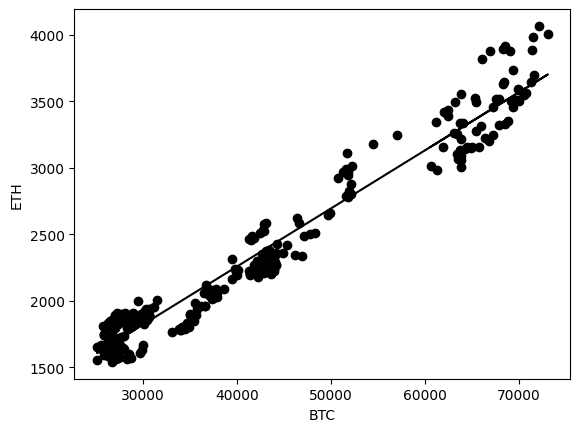

In [21]:
fbtc = ny.array(fechamentobtc)
feth = ny.array(fechamentoeth)

beta, beta0, r_value, p_value, std_err = stats.linregress(fbtc, feth)

ylin = beta*fbtc + beta0

fig.plot(fbtc, ylin, '-k', fbtc, feth, 'ok')
fig.xlabel('BTC')
fig.ylabel('ETH')

cor, pval = stats.pearsonr(fbtc, feth)


In [27]:
print('Correlação:', cor)
print('P-valor:', pval)
print(f'r_value: {(r_value * 100):.2f}', '%')

Correlação: 0.9777951916071131
P-valor: 8.125820000642676e-250
r_value: 97.78 %


<Axes: >

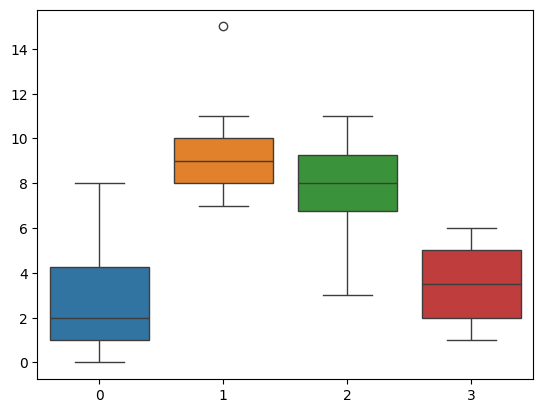

In [43]:
wb = ox.load_workbook('DadExemp.xlsx')

dad = wb['Sheet1']

dados = [[],[],[],[]]
i = 0
for linha in dad.iter_cols(min_row=1, min_col=1,  max_col=4):
	for celula in linha:
		dados[i].append(celula.value)
	i+=1

sns.boxplot(data=dados)

<Axes: >

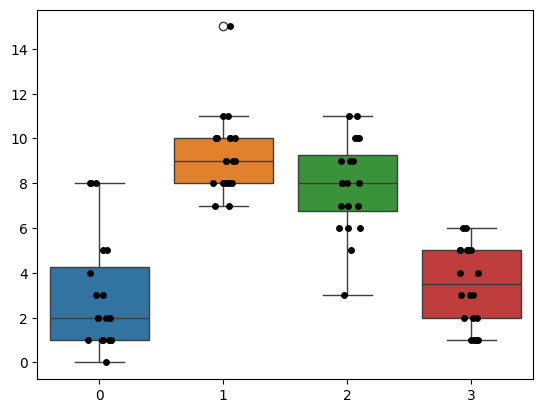

In [44]:
sns.boxplot(data=dados)
sns.stripplot(data=dados, marker='o', color='black')

/tmp/ipykernel_37/1696160495.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dados[0], color='blue')
/tmp/ipykernel_37/1696160495.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dados[1], color='red')
/tmp/ipykernel_37/1696160495.py:11: UserWarning: 

`distplot` is a deprecated function 

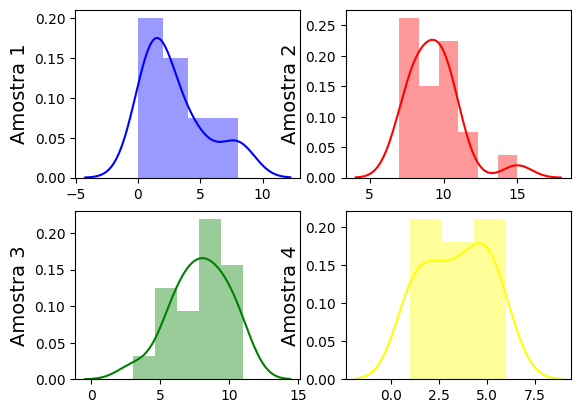

In [50]:
fig.figure()
fig.subplot(221)
sns.distplot(dados[0], color='blue')
fig.ylabel('Amostra 1', fontsize=14)

fig.subplot(222)
sns.distplot(dados[1], color='red')
fig.ylabel('Amostra 2', fontsize=14)

fig.subplot(223)
sns.distplot(dados[2], color='green')
fig.ylabel('Amostra 3', fontsize=14)

fig.subplot(224)
sns.distplot(dados[3], color='yellow')
fig.ylabel('Amostra 4', fontsize=14)

fig.show()

Text(0, 0.5, 'Amostra 4')

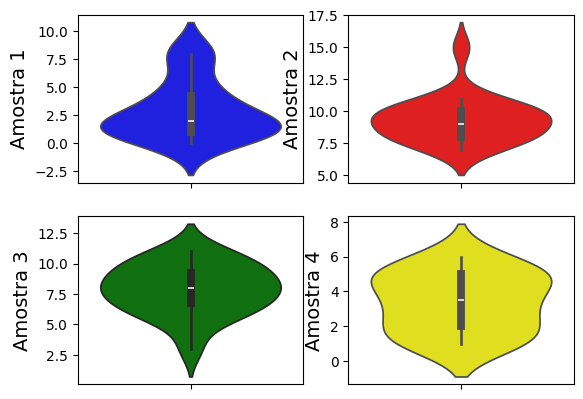

In [53]:
fig.figure()
fig.subplot(221)
sns.violinplot(dados[0], color='blue')
fig.ylabel('Amostra 1', fontsize=14)

fig.subplot(222)
sns.violinplot(dados[1], color='red')
fig.ylabel('Amostra 2', fontsize=14)

fig.subplot(223)
sns.violinplot(dados[2], color='green')
fig.ylabel('Amostra 3', fontsize=14)

fig.subplot(224)
sns.violinplot(dados[3], color='yellow')
fig.ylabel('Amostra 4', fontsize=14)


<Axes: >

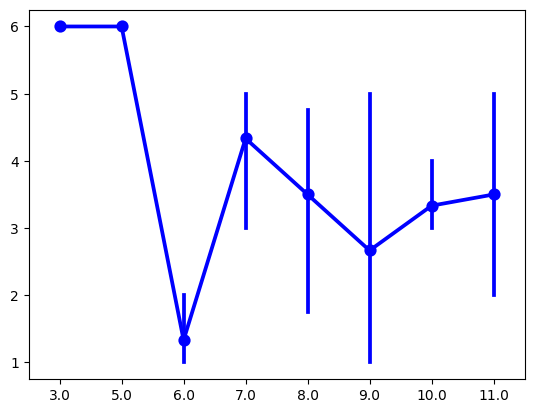

In [57]:

sns.pointplot(x=dados[2], y=dados[3], color='blue')
